<a href="https://colab.research.google.com/github/freezerjan/house-price-prediction-linikea-/blob/main/housep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import files
uploaded = files.upload()

Saving bishkek_2023.csv to bishkek_2023 (1).csv


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
df1 = pd.read_csv("bishkek_2023.csv")
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [66]:
import os
print(os.getcwd())

/content


In [67]:
df1.shape

(10000, 13)

In [68]:
df1.groupby('condition')['condition'].agg('count')

,condition
condition,
евроремонт,2455
не достроено,57
под самоотделку (ПСО),1899
свободная планировка,10
среднее,550
требует ремонта,184
хорошее,1890
черновая отделка,36


In [69]:
df2 = df1.drop(['source'],axis='columns')
df2.head()

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,year,date,condition
0,110880,720,154,4,Октябрьский район,Магистраль,кирпичный,12,14,2023.0,2023-02-04 20:05:01,под самоотделку (ПСО)
1,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023.0,2023-02-04 20:04:49,под самоотделку (ПСО)
2,57750,750,77,2,Октябрьский район,Магистраль,монолитный,5,12,2023.0,2023-02-04 20:04:37,под самоотделку (ПСО)
3,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023.0,2023-02-04 20:04:01,под самоотделку (ПСО)
4,55000,1279,43,1,Ленинский район,Академия Наук,кирпичный,1,12,2013.0,2023-02-04 20:02:37,хорошее


In [70]:
df2.isnull().sum()

,0
price,0
m2_price,0
square,0
rooms,0
district,10
micro_district,457
building_type,0
floor,0
floors,0
year,4369


In [ ]:
df3 = df2.dropna()
df3.isnull().sum()

,0
price,0
m2_price,0
square,0
rooms,0
district,0
micro_district,0
building_type,0
floor,0
floors,0
year,0


In [ ]:
df3['rooms'].unique()

array(['4', '2', '1', '3', '5', '6 и более', 'свободная планировка'],
      dtype=object)

In [ ]:
len(df3.micro_district.unique())

119

In [ ]:
df3.loc[:, "micro_district"] = df3.micro_district.apply(lambda x: x.strip())

location_stats = df3.groupby('micro_district')['micro_district'].agg('count').sort_values(ascending=False)
location_stats

,micro_district
micro_district,
Магистраль,1108
Кок-Жар ж/м,161
КНУ,109
12 м-н,88
Джал 15 м-н,82
...,...
Рухий Мурас ж/м,1
Таш Рабат,1
Учкун ж/м,1


In [ ]:
len(location_stats[location_stats<=6])

40

In [ ]:
interpen_6=location_stats[location_stats<=6]
interpen_6

,micro_district
micro_district,
Киргизия 1 ж/м,6
Ген прокуратура,6
Учкун м-н,6
Улан-2 м-н,6
Достук м-н,5
Цирк/Дворец бракосочетания,5
Достук,5
Ак-Орго ж/м,5
Кара Дарыя,5


In [ ]:
len(df3.micro_district.unique())

119

In [ ]:
df3.loc[:, "micro_district"] = df3.micro_district.apply(lambda x: 'другие' if x in interpen_6 else x)
len(df3.micro_district.unique())

80

In [ ]:
df3.head(10)

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,year,date,condition
0,110880,720,154,4,Октябрьский район,Магистраль,кирпичный,12,14,2023.0,2023-02-04 20:05:01,под самоотделку (ПСО)
1,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023.0,2023-02-04 20:04:49,под самоотделку (ПСО)
2,57750,750,77,2,Октябрьский район,Магистраль,монолитный,5,12,2023.0,2023-02-04 20:04:37,под самоотделку (ПСО)
3,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023.0,2023-02-04 20:04:01,под самоотделку (ПСО)
4,55000,1279,43,1,Ленинский район,Академия Наук,кирпичный,1,12,2013.0,2023-02-04 20:02:37,хорошее
7,158990,880,181,4,Октябрьский район,Магистраль,монолитный,9,14,2020.0,2023-02-04 19:39:26,под самоотделку (ПСО)
8,68000,1283,53,1,Октябрьский район,Магистраль,монолитный,7,9,2019.0,2023-02-04 19:39:14,евроремонт
15,124820,790,158,4,Октябрьский район,Магистраль,монолитный,7,14,2021.0,2023-02-04 19:37:50,под самоотделку (ПСО)
19,112000,1244,90,3,Первомайский район,Военторг,монолитный,13,13,2020.0,2023-02-04 19:37:02,евроремонт
21,51000,1062,48,1,Октябрьский район,Магистраль,монолитный,7,9,2022.0,2023-02-04 19:36:26,евроремонт


In [ ]:
df3.loc[:, "rooms"] = pd.to_numeric(df3["rooms"], errors="coerce")

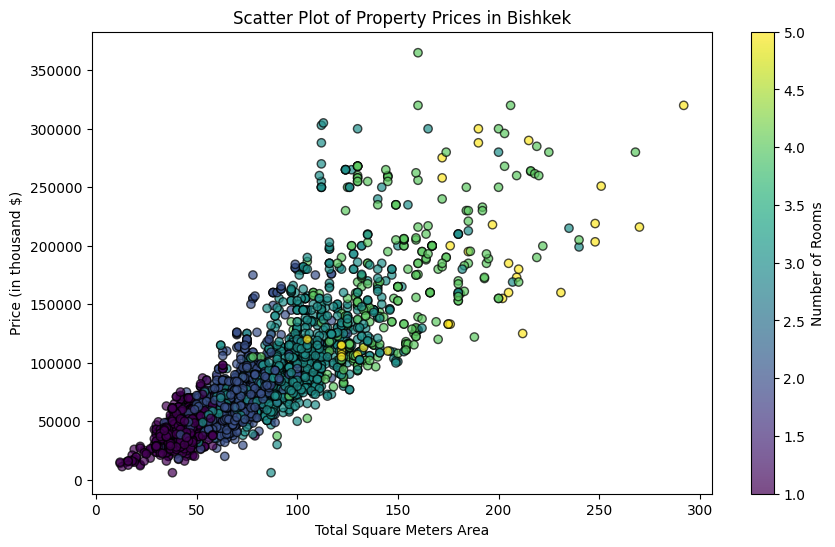

In [ ]:
square_min, square_max = 0, 300  # Оставляем площади до 300 м²
price_min, price_max = 0, 400000  # Оставляем цены до 400 000 $

# Фильтруем данные, оставляя только точки внутри границ
df_filtered = df3[(df3["square"] >= square_min) & (df3["square"] <= square_max) &
                 (df3["price"] >= price_min) & (df3["price"] <= price_max)]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_filtered["square"], df_filtered["price"], c=df_filtered["rooms"], cmap="viridis", alpha=0.7, edgecolors="k")

plt.xlabel("Total Square Meters Area")
plt.ylabel("Price (in thousand $)")
plt.title("Scatter Plot of Property Prices in Bishkek")

cbar = plt.colorbar(scatter)
cbar.set_label("Number of Rooms")

plt.show()

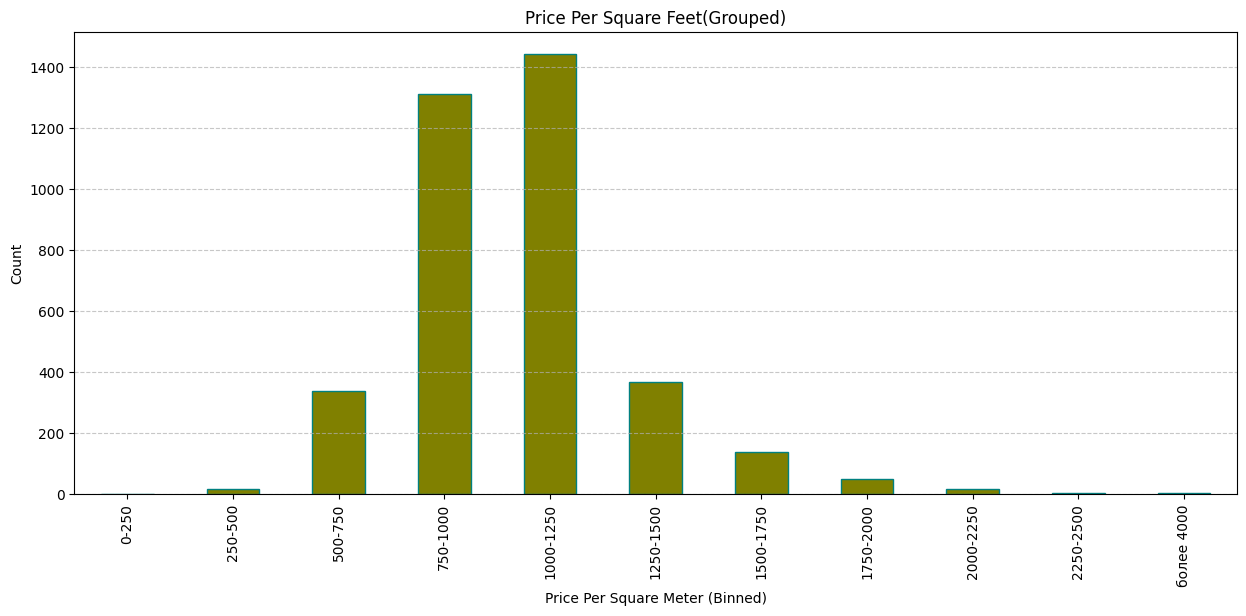

In [82]:
import matplotlib

bins = list(range(0, 2501, 250)) + [np.inf]  # Последний интервал включает все значения >4000
labels = [f"{i}-{i+250}" for i in range(0, 2500, 250)] + ["более 4000"]

df3.loc[:,"binned_m2_price"] = pd.cut(df3["m2_price"], bins=bins, labels=labels, right=False)

price_counts = df3["binned_m2_price"].value_counts().sort_index()

plt.figure(figsize=(15, 6))
price_counts.plot(kind="bar", color="olive", edgecolor="teal")

plt.xlabel("Price Per Square Meter (Binned)")
plt.ylabel("Count")
plt.title("Price Per Square Feet(Grouped)")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [ ]:
df3.floors.unique()

array([14, 12,  9, 13,  8, 10, 16,  4,  6,  3,  5, 11, 19, 18, 15,  7, 20,
        2, 17, 25,  1, 21, 23])

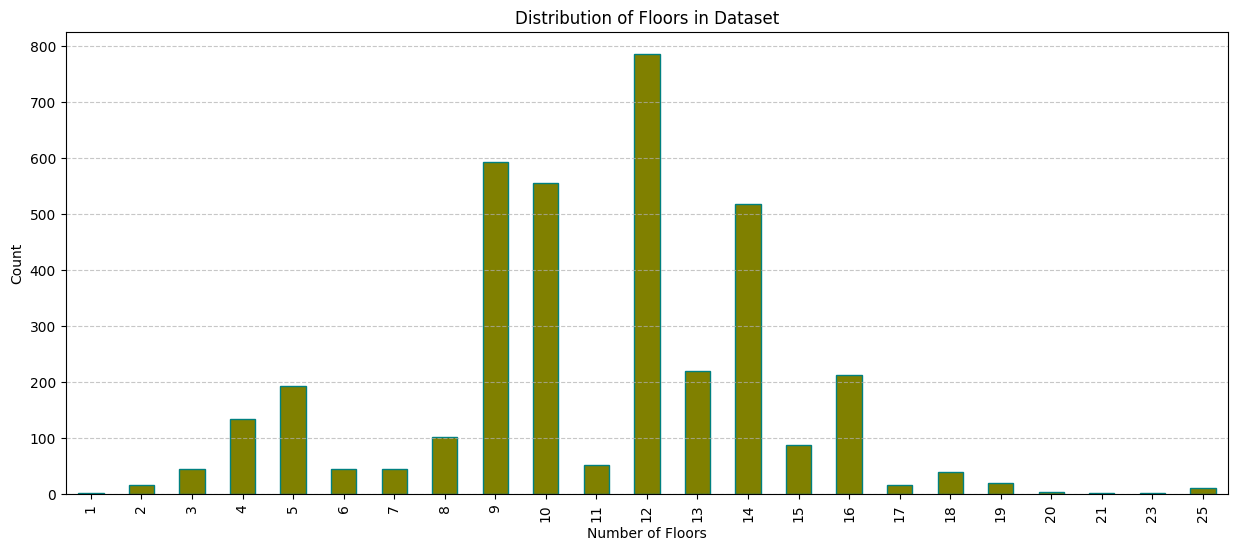

In [ ]:
df3 = df3.dropna(subset=["floors"])

floor_counts = df3["floors"].value_counts().sort_index()

plt.figure(figsize=(15, 6))
floor_counts.plot(kind="bar",  color="olive", edgecolor="teal")

plt.xlabel("Number of Floors")
plt.ylabel("Count")
plt.title("Distribution of Floors in Dataset")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [ ]:
df3.shape

(3697, 13)

In [ ]:
df3[df3.floor>10]

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,year,date,condition,binned_m2_price
0,110880,720,154,4.0,Октябрьский район,Магистраль,кирпичный,12,14,2023.0,2023-02-04 20:05:01,под самоотделку (ПСО),500-750
19,112000,1244,90,3.0,Первомайский район,Военторг,монолитный,13,13,2020.0,2023-02-04 19:37:02,евроремонт,1000-1250
38,50000,1111,45,1.0,Ленинский район,Ипподром,монолитный,12,12,2020.0,2023-02-04 19:31:38,евроремонт,1000-1250
48,107000,1039,103,3.0,Октябрьский район,Магистраль,монолитный,11,16,2022.0,2023-02-04 19:28:38,под самоотделку (ПСО),1000-1250
59,76000,710,107,3.0,Октябрьский район,Магистраль,монолитный,11,12,2021.0,2023-02-04 19:26:26,под самоотделку (ПСО),500-750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9862,80750,950,85,2.0,Октябрьский район,Магистраль,монолитный,11,18,2024.0,2022-11-30 12:30:06,не достроено,750-1000
9888,37700,650,58,1.0,Октябрьский район,Магистраль,монолитный,13,16,2024.0,2022-11-30 11:42:25,под самоотделку (ПСО),500-750
9941,76145,785,97,3.0,Первомайский район,VEFA,монолитный,12,15,2022.0,2022-11-30 10:16:50,под самоотделку (ПСО),750-1000
9952,29000,792,37,1.0,Октябрьский район,Магистраль,монолитный,12,13,2024.0,2022-11-30 9:19:56,под самоотделку (ПСО),750-1000


In [ ]:
df3[df3.floor>10]

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,year,date,condition,binned_m2_price
0,110880,720,154,4.0,Октябрьский район,Магистраль,кирпичный,12,14,2023.0,2023-02-04 20:05:01,под самоотделку (ПСО),500-750
19,112000,1244,90,3.0,Первомайский район,Военторг,монолитный,13,13,2020.0,2023-02-04 19:37:02,евроремонт,1000-1250
38,50000,1111,45,1.0,Ленинский район,Ипподром,монолитный,12,12,2020.0,2023-02-04 19:31:38,евроремонт,1000-1250
48,107000,1039,103,3.0,Октябрьский район,Магистраль,монолитный,11,16,2022.0,2023-02-04 19:28:38,под самоотделку (ПСО),1000-1250
59,76000,710,107,3.0,Октябрьский район,Магистраль,монолитный,11,12,2021.0,2023-02-04 19:26:26,под самоотделку (ПСО),500-750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9862,80750,950,85,2.0,Октябрьский район,Магистраль,монолитный,11,18,2024.0,2022-11-30 12:30:06,не достроено,750-1000
9888,37700,650,58,1.0,Октябрьский район,Магистраль,монолитный,13,16,2024.0,2022-11-30 11:42:25,под самоотделку (ПСО),500-750
9941,76145,785,97,3.0,Первомайский район,VEFA,монолитный,12,15,2022.0,2022-11-30 10:16:50,под самоотделку (ПСО),750-1000
9952,29000,792,37,1.0,Октябрьский район,Магистраль,монолитный,12,13,2024.0,2022-11-30 9:19:56,под самоотделку (ПСО),750-1000


In [ ]:
X = df3.drop(['price'],axis='columns')
X.head(3)

,m2_price,square,rooms,district,micro_district,building_type,floor,floors,year,date,condition,binned_m2_price
0,720,154,4.0,Октябрьский район,Магистраль,кирпичный,12,14,2023.0,2023-02-04 20:05:01,под самоотделку (ПСО),500-750
1,740,77,2.0,Октябрьский район,Магистраль,кирпичный,5,12,2023.0,2023-02-04 20:04:49,под самоотделку (ПСО),500-750
2,750,77,2.0,Октябрьский район,Магистраль,монолитный,5,12,2023.0,2023-02-04 20:04:37,под самоотделку (ПСО),750-1000


In [ ]:
X.shape

(3697, 12)

In [ ]:
y = df3.price
y.head(3)

,price
0,110880
1,57000
2,57750


In [ ]:
len(y)

3697

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
!pip install scikit-learn

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Выравнивание столбцов, если в обучающем и тестовом наборах есть различия
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

In [ ]:

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9126243989079994

In [77]:
print(df3.dtypes)

price                 int64
m2_price              int64
square                int64
rooms                object
district             object
micro_district       object
building_type        object
floor                 int64
floors                int64
year                float64
date                 object
condition            object
binned_m2_price    category
dtype: object


In [78]:
le = LabelEncoder()
df3["rooms"] = le.fit_transform(df3["rooms"])

In [79]:
print(df3.isnull().sum())
df3 = df3.dropna()

price              0
m2_price           0
square             0
rooms              0
district           0
micro_district     0
building_type      0
floor              0
floors             0
year               0
date               0
condition          0
binned_m2_price    0
dtype: int64


In [80]:
X = df1.drop(columns=["price"])
y = df1["price"]

In [88]:
columns_to_drop = ["price", "m2_price", "date", "source"]
existing_columns = [col for col in columns_to_drop if col in df3.columns]

X = df3.drop(columns=existing_columns)
y = df3["price"]

In [94]:
X = df3.drop(columns=["price", "m2_price", "date", "source"], axis=1, errors="ignore")
y = df3["price"]

X["rooms"] = X["rooms"].replace("6 и более", 6).astype(float)

categorical_features = ["district", "micro_district", "building_type", "condition"]
numerical_features = ["square", "rooms", "floor", "floors", "year"]

preprocessor = ColumnTransformer(transformers=[
    ("num", SimpleImputer(strategy="mean"), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=kf, scoring="r2")

# Выводим средний результат
print("Средняя точность (R^2):", np.mean(scores))

Средняя точность (R^2): 0.7955090337936804


In [99]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                # 'normalize': [True, False]  # Removed normalize
                'positive': [True, False]  # Use 'positive' for non-negative coefficients
                # or you can scale your data before using the model
                # with StandardScaler() from sklearn.preprocessing
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [100]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]